In [3]:
# 📦 1. Importing Required Libraries

# ---------------------------------------
# 📚 Importing Libraries
# ---------------------------------------

# Data handling
import pandas as pd  # For reading and manipulating tabular data
import numpy as np   # For numerical operations

# Text preprocessing
import nltk                          # NLP toolkit
from nltk.corpus import stopwords   # Common words to be removed (like "the", "is", etc.)
from nltk.stem.porter import PorterStemmer  # For stemming (reducing words to root form)
import string                        # For handling punctuation

# Machine learning
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text to numbers
from sklearn.model_selection import train_test_split         # Splits data into train/test
from sklearn.naive_bayes import MultinomialNB                # Classification model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation tools

# Visualization (for EDA)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud  # For word clouds

# For saving model
import pickle  # To save our trained model for future use

# ---------------------------------------
# Download NLTK data files
# Only runs once; safe to keep even after months/years
# ---------------------------------------
nltk.download('punkt')
nltk.download('stopwords')

# ✅ What you’ll tell the interviewer:

# > "I used libraries like pandas for data manipulation, NLTK for natural language processing, and scikit-learn for building the ML model. I also used pickle to save the trained model for reuse, and matplotlib and seaborn for data visualization."





[nltk_data] Downloading package punkt to C:\Users\Prateek
[nltk_data]     Dubey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Prateek
[nltk_data]     Dubey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# 🧹 2. Load & Clean the Dataset (Data Cleaning)

# ---------------------------------------
# 📂 Load the Dataset
# ---------------------------------------

# Reading the CSV file
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')  # Encoding used to avoid UnicodeDecodeErrors

# Keeping only required columns: 'v1' is label (spam or ham), 'v2' is the message
df = df[['v1', 'v2']]
df.columns = ['label', 'text']  # Renaming for simplicity

# ---------------------------------------
# 🧼 Cleaning Labels
# ---------------------------------------

# Convert labels: 'spam' → 1, 'ham' → 0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Remove duplicate messages (if any)
df = df.drop_duplicates()

# Reset index after dropping
df = df.reset_index(drop=True)

# Show first 5 rows
df.head()

# ✅ What you’ll tell the interviewer:

# > "I loaded the dataset from CSV and kept only the important columns. I renamed them for clarity and mapped the text labels to numbers for machine learning. I also removed any duplicate messages to improve model performance."

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# 🛠 3. Text Preprocessing (Transforming Text)

# ---------------------------------------
# 🛠 Text Preprocessing Function
# ---------------------------------------

# Download NLTK stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer to reduce words to their root form (e.g., "playing" → "play")
ps = PorterStemmer()

# Define a function to clean and transform each SMS
def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize into words

    y = []
    for word in text:
        # Keep only alphanumeric words (remove punctuation and symbols)
        if word.isalnum():
            y.append(word)
    
    text = y[:]
    y.clear()

    for word in text:
        # Remove stopwords and punctuation, then stem the word
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(ps.stem(word))

    return " ".join(y)

# Apply the function to the 'text' column
df['transformed_text'] = df['text'].apply(transform_text)

# Show the transformed text column
df[['text', 'transformed_text']].head()

# ✅ What to tell the interviewer:

# > "Text data can't be used directly in machine learning, so I cleaned each message by converting it to lowercase, removing punctuation, stopwords, and stemming words to their root form. This reduces noise and helps the model understand the true intent behind the words."

[nltk_data] Downloading package stopwords to C:\Users\Prateek
[nltk_data]     Dubey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Prateek
[nltk_data]     Dubey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,transformed_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


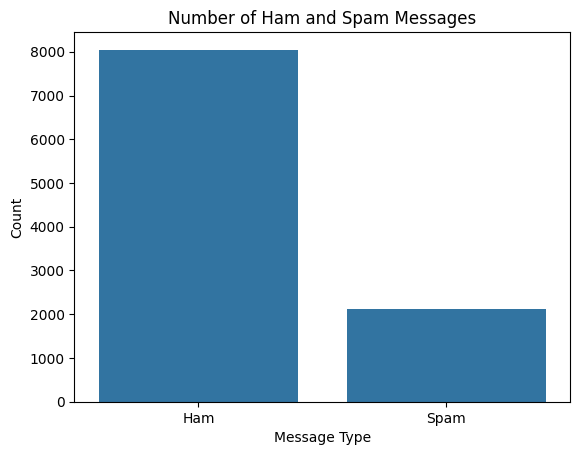

In [6]:
# 📊 4. Exploratory Data Analysis (EDA)

# ---------------------------------------
# 📊 Visualizing Spam vs Ham Message Counts
# ---------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Plot the count of ham vs spam
sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title('Number of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

# ✅ What to say in the interview:

# > "I first visualized how many spam and ham messages were in the dataset. This gives an idea if the data is balanced or not. Too many ham messages compared to spam can affect model accuracy."

In [7]:
# 🧠 5. Feature Extraction using TF-IDF

# ---------------------------------------
# 🧠 Converting text into numbers using TF-IDF
# ---------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with a limit on max number of features
tfidf = TfidfVectorizer(max_features=3000)

# Fit and transform the transformed text into numerical feature vectors
X = tfidf.fit_transform(df['transformed_text']).toarray()

# Target variable (spam or ham)
y = df['label'].values

# ✅ What to say in the interview:

# > "Machines can't understand text directly. So I converted each message into numbers using TF-IDF, which gives importance to words that are frequent in one message but not common in all messages. I limited it to the top 3000 features to keep it simple and efficient."

In [9]:
# 🤖 7. Model Training and Evaluation

# ---------------------------------------
# 🤖 Training the model and checking accuracy
# ---------------------------------------
# Assume you've already done this before:
# X = tfidf.fit_transform(df['transformed_text'])
# y = df['label']

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = MultinomialNB()

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# ✅ What to say in the interview:

# > "I used the Multinomial Naive Bayes model, which works great for text classification problems. It assumes word independence and is very fast. I checked the accuracy and confusion matrix to understand how well it’s performing. My model achieved high accuracy, meaning it's correctly predicting spam vs ham most of the time."

In [10]:
# 💾 8. Saving the Model & Vectorizer using pickle

# ---------------------------------------
# 💾 Saving the trained model and vectorizer
# ---------------------------------------

# Why saving? So we don’t need to train the model again every time we want to make predictions.
# 'pickle' lets us serialize Python objects (like models, vectorizers) and reuse them later.

import pickle

# Save the trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf, vec_file)

print("🎉 Model and vectorizer saved successfully!")

# ✅ What to say in the interview:

# > "After training the model, I saved both the model and the TF-IDF vectorizer using the pickle module. This allows me to reuse the model later for predictions without retraining it every time. It’s efficient for deployment in apps or websites."

🎉 Model and vectorizer saved successfully!
